### DATAFRAME

In [40]:
import re
import os
import xml.etree.ElementTree as ET
import mysql.connector 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
cnx = mysql.connector.connect(user='root', password='AlumnaAdalab',
                              host='127.0.0.1',
                              database='proyecto_1_equipo_1')
mycursor = cnx.cursor()
mycursor.execute("""SELECT xml.age, txt.q3, txt.q4, txt.q5, txt.q20, txt.q21
                    FROM data_txt AS txt
                    INNER JOIN data_xml AS xml
                    ON txt.index_sql = xml.index_sql
                    WHERE xml.gender = "Woman";""")

myresult = mycursor.fetchall()
df_proyecto = pd.DataFrame(myresult, columns = ["edad","pais", "nivel de estudios", "puesto de trabajo", "sector", "tamaño de la compañia"])
cnx.close()

In [25]:
df_proyecto

,edad,pais,nivel de estudios,puesto de trabajo,sector,tamaño de la compañia
0,25-29,India,I prefer not to answer,Currently not employed,,
1,18-21,India,Some college/university study without earning ...,Student,,
2,18-21,India,Masterâ€™s degree,Student,,
3,18-21,India,Masterâ€™s degree,Student,,
4,25-29,Turkey,Bachelorâ€™s degree,Data Scientist,Computers/Technology,"10,000 or more employees"
...,...,...,...,...,...,...
4885,18-21,India,Some college/university study without earning ...,Student,,
4886,18-21,India,Bachelorâ€™s degree,Machine Learning Engineer,Academics/Education,0-49 employees
4887,18-21,India,Bachelorâ€™s degree,Student,,
4888,22-24,Taiwan,Masterâ€™s degree,Student,,


In [26]:
df_proyecto["pais"].unique()



array(['India', 'Turkey', 'Poland', 'Iran, Islamic Republic of...',
       'Egypt', 'Brazil', 'Viet Nam', 'United States of America',
       'Bangladesh', 'Indonesia', 'Russia', 'Italy', 'Argentina',
       'Singapore', 'Sweden', 'Canada', 'Other', 'Morocco', 'Taiwan',
       'Tunisia', 'Ireland', 'Hong Kong (S.A.R.)', 'Israel', 'Pakistan',
       'Philippines', 'Nigeria', 'Sri Lanka',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Arab Emirates', 'Thailand', 'Colombia', 'Spain', 'Japan',
       'Germany', 'China', 'Belgium', 'Austria', 'Mexico', 'South Korea',
       'France', 'Romania', 'Ukraine', 'Saudi Arabia', 'Kenya',
       'Netherlands', 'Portugal', 'Australia', 'Malaysia', 'South Africa',
       'Algeria', 'Kazakhstan', 'Peru', 'Norway', 'Ecuador',
       'Czech Republic', 'Greece', 'Switzerland',
       'I do not wish to disclose my location', 'Nepal', 'Ghana',
       'Denmark', 'Uganda', 'Ethiopia', 'Iraq', 'Chile', 'Belarus'],
      dtype=obje

In [27]:
condicion = [df_proyecto["pais"] == ['India', 'Turkey','Viet Nam', 'Bangladesh', 'Indonesia', 
        'Singapore', 'Taiwan', 'Hong Kong (S.A.R.)', 'Israel', 'Pakistan', 'Philippines', 'United Arab Emirates', 'Thailand', 'Japan', 'China', 'South Korea', 
       'Saudi Arabia', 'Malaysia', 'Kazakhstan', 'Nepal'], 
       df_proyecto["pais"] == ['Iran, Islamic Republic of...', 'Egypt','Morocco','Tunisia','Nigeria','Kenya','South Africa',
       'Algeria','Ghana','Uganda', 'Ethiopia', 'Iraq'],
       df_proyecto["pais"] == ['Poland','Russia', 'Italy', 'Sweden',
       'Ireland', 'United Kingdom of Great Britain and Northern Ireland','Spain',
       'Germany', 'Belgium', 'Austria',
       'France', 'Romania', 'Ukraine', 
       'Netherlands', 'Portugal', 'Norway',
       'Czech Republic', 'Greece', 'Switzerland',
       'Denmark','Belarus'],
       df_proyecto["pais"] == ['United States of America','Canada'],
        df_proyecto["pais"] == [
       'Brazil', 'Argentina',
       'Colombia', 'Mexico', 'Peru', 'Ecuador',
       'Chile'],
       df_proyecto["pais"] == ['Australia']
       ]

ValueError: ('Lengths must match to compare', (4890,), (20,))

       Incluimos a los hombres en la consulta y creamos una nueva columna con los continentes usando "apply()".

In [28]:
cnx = mysql.connector.connect(user='root', password='AlumnaAdalab',
                              host='127.0.0.1',
                              database='proyecto_1_equipo_1')
mycursor = cnx.cursor()
mycursor.execute("""SELECT xml.gender, xml.age, txt.q3, txt.q4, txt.q5, txt.q20, txt.q21
                    FROM data_txt AS txt
                    INNER JOIN data_xml AS xml
                    ON txt.index_sql = xml.index_sql ;""")

myresult = mycursor.fetchall()
df_proyecto2 = pd.DataFrame(myresult, columns = ["género","edad","pais", "nivel de estudios", "puesto de trabajo", "sector", "tamaño de la compañia"])
cnx.close()

In [29]:
df_proyecto2.head()

,género,edad,pais,nivel de estudios,puesto de trabajo,sector,tamaño de la compañia
0,Man,50-54,Indonesia,Masterâ€™s degree,Program/Project Manager,Manufacturing/Fabrication,"1000-9,999 employees"
1,Man,22-24,Pakistan,Masterâ€™s degree,Software Engineer,Academics/Education,"1000-9,999 employees"
2,Man,45-49,Mexico,Doctoral degree,Research Scientist,Academics/Education,"1000-9,999 employees"
3,Man,45-49,India,Doctoral degree,Other,Academics/Education,50-249 employees
4,Woman,25-29,India,I prefer not to answer,Currently not employed,,


In [30]:
continente1 = ['India', 'Turkey','Viet Nam', 'Bangladesh', 'Indonesia', 
        'Singapore', 'Taiwan', 'Hong Kong (S.A.R.)', 'Israel', 'Pakistan', 'Philippines', 'United Arab Emirates', 'Thailand', 'Japan', 'China', 'South Korea', 
       'Saudi Arabia', 'Malaysia', 'Kazakhstan', 'Nepal']

continente2 = ['Iran, Islamic Republic of...', 'Egypt','Morocco','Tunisia','Nigeria','Kenya','South Africa',
       'Algeria','Ghana','Uganda', 'Ethiopia', 'Iraq']

continente3 = ['Poland','Russia', 'Italy', 'Sweden',
       'Ireland', 'United Kingdom of Great Britain and Northern Ireland','Spain',
       'Germany', 'Belgium', 'Austria',
       'France', 'Romania', 'Ukraine', 
       'Netherlands', 'Portugal', 'Norway',
       'Czech Republic', 'Greece', 'Switzerland',
       'Denmark','Belarus']

continente4 = ['United States of America','Canada']

continente5 = ['Brazil', 'Argentina','Colombia', 'Mexico', 'Peru', 'Ecuador','Chile']

continente6 = ['Australia']

In [31]:
def continente(pais):
    if pais in continente1:
        return "Asia"
    elif pais in continente2:
        return "África"
    elif pais in continente3:
        return "Europa"
    elif pais in continente4:
        return "América del Norte"
    elif pais in continente5:
        return "América del Sur"
    elif pais in continente6:
        return "Oceanía"

In [32]:
df_proyecto2["continente"] = df_proyecto2["pais"].apply(continente)

In [33]:
df_proyecto2.head()

,género,edad,pais,nivel de estudios,puesto de trabajo,sector,tamaño de la compañia,continente
0,Man,50-54,Indonesia,Masterâ€™s degree,Program/Project Manager,Manufacturing/Fabrication,"1000-9,999 employees",Asia
1,Man,22-24,Pakistan,Masterâ€™s degree,Software Engineer,Academics/Education,"1000-9,999 employees",Asia
2,Man,45-49,Mexico,Doctoral degree,Research Scientist,Academics/Education,"1000-9,999 employees",América del Sur
3,Man,45-49,India,Doctoral degree,Other,Academics/Education,50-249 employees,Asia
4,Woman,25-29,India,I prefer not to answer,Currently not employed,,,Asia


        Filtramos el df por género

In [64]:
filtro_mw= df_proyecto2[(df_proyecto2["género"]== "Man") | (df_proyecto2["género"]=="Woman")]

    Creamos un gráfico para ver las diferencias entre género (H/M) por continente.

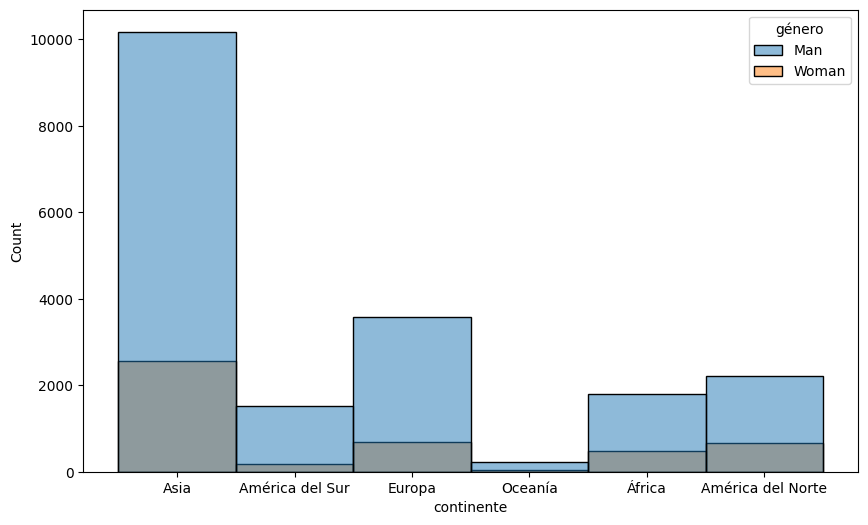

In [47]:
plt.figure(figsize=(10,6))

fig = sns.histplot(x = filtro_mw["continente"], data = filtro_mw, hue = filtro_mw["género"])

plt.show()

        Creamos otra gráfica para ver las diferencias por género en distintos sectores.

In [62]:
df_proyecto2["sector"].value_counts()

                                          9648
Computers/Technology                      4079
Academics/Education                       3214
Accounting/Finance                        1459
Other                                     1136
Manufacturing/Fabrication                  871
Medical/Pharmaceutical                     776
Government/Public Service                  726
Online Service/Internet-based Services     585
Energy/Mining                              558
Retail/Sales                               536
Insurance/Risk Assessment                  424
Marketing/CRM                              373
Broadcasting/Communications                326
Shipping/Transportation                    316
Non-profit/Service                         300
Online Business/Internet-based Sales       275
Military/Security/Defense                  197
Hospitality/Entertainment/Sports           173
Name: sector, dtype: int64

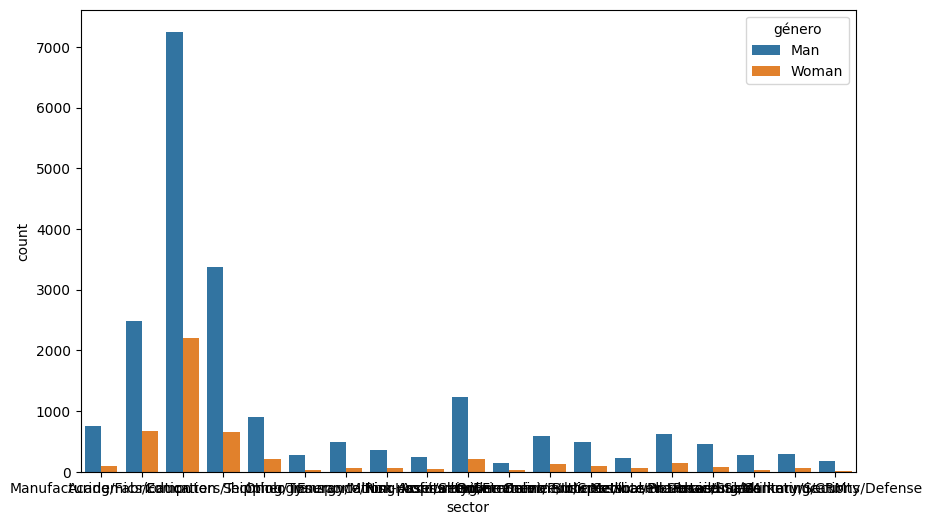

In [71]:
plt.figure(figsize=(10,6))

fig = sns.countplot(x =  filtro_mw["sector"],  data = filtro_mw, hue = filtro_mw["género"])

plt.show()